In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Project2/wikihowAll.csv")

In [ ]:
data

,headline,title,text
0,"\nKeep related supplies in the same area.,\nMa...",How to Be an Organized Artist1,"If you're a photographer, keep all the necess..."
1,\nCreate a sketch in the NeoPopRealist manner ...,How to Create a Neopoprealist Art Work,See the image for how this drawing develops s...
2,"\nGet a bachelor’s degree.,\nEnroll in a studi...",How to Be a Visual Effects Artist1,It is possible to become a VFX artist without...
3,\nStart with some experience or interest in ar...,How to Become an Art Investor,The best art investors do their research on t...
4,"\nKeep your reference materials, sketches, art...",How to Be an Organized Artist2,"As you start planning for a project or work, ..."
...,...,...,...
215360,\nConsider changing the spelling of your name....,How to Pick a Stage Name3,"If you have a name that you like, you might f..."
215361,"\nTry out your name.,\nDon’t legally change yo...",How to Pick a Stage Name4,Your name might sound great to you when you s...
215362,"\nUnderstand the process of relief printing.,\...",How to Identify Prints1,Relief printing is the oldest and most tradit...
215363,\nUnderstand the process of intaglio printing....,How to Identify Prints2,"Intaglio is Italian for ""incis­ing,"" and corr..."


In [ ]:
lengh = []
maxLen = 0
for x in range(data.shape[0]):
    if x% 1000==0:
        print(x)
    tmp = str(data.iloc[x]['headline'])
    lengh.append(len(tmp.split("."))-1)
    maxLen = max(maxLen,len(tmp.split("."))-1)

210000
211000
212000
213000
214000
215000


In [ ]:
maxLen

10

In [ ]:
import matplotlib.pyplot as plt

(array([2.15363e+05, 2.00000e+00]),
 array([  0., 310., 620.]),
 <a list of 2 Patch objects>)

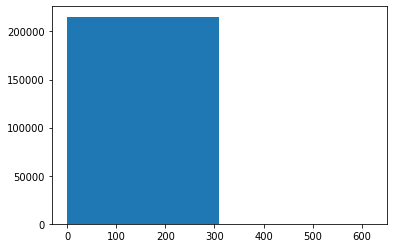

In [ ]:
plt.hist(lengh,2)

In [ ]:
tmp = str(data.iloc[1]['headline'])
len(tmp.split("."))-1

13

In [ ]:
lengh

array([ 8, 13,  7, ...,  4,  6,  6])

In [ ]:
import numpy as np
lengh = np.asarray(lengh)

In [ ]:
np.where(lengh < 3)[0].shape[0]

# Tùy chọn loại bỏ văn bản không phù hợp

In [ ]:
data = data.drop(np.where(lengh < 3)[0])

In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data

,headline,title,text
0,"\nKeep related supplies in the same area.,\nMa...",How to Be an Organized Artist1,"If you're a photographer, keep all the necess..."
1,\nCreate a sketch in the NeoPopRealist manner ...,How to Create a Neopoprealist Art Work,See the image for how this drawing develops s...
2,"\nGet a bachelor’s degree.,\nEnroll in a studi...",How to Be a Visual Effects Artist1,It is possible to become a VFX artist without...
3,\nStart with some experience or interest in ar...,How to Become an Art Investor,The best art investors do their research on t...
4,"\nKeep your reference materials, sketches, art...",How to Be an Organized Artist2,"As you start planning for a project or work, ..."
...,...,...,...
205418,\nConsider changing the spelling of your name....,How to Pick a Stage Name3,"If you have a name that you like, you might f..."
205419,"\nTry out your name.,\nDon’t legally change yo...",How to Pick a Stage Name4,Your name might sound great to you when you s...
205420,"\nUnderstand the process of relief printing.,\...",How to Identify Prints1,Relief printing is the oldest and most tradit...
205421,\nUnderstand the process of intaglio printing....,How to Identify Prints2,"Intaglio is Italian for ""incis­ing,"" and corr..."


In [ ]:
np.where(lengh < 4)[0].shape[0]

35355

In [ ]:
data.to_csv('/content/drive/MyDrive/Project2/wikiP1.csv',index=False)

In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Project2/wikiP1.csv")

In [ ]:
data = data.dropna(axis =0,how='any')

In [ ]:
data = data.reset_index(drop=True)

Thực hiện gán nhãn các câu sử dụng thuật toán tham lam



In [ ]:
def _get_ngrams(n, text):
    """Calcualtes n-grams.
    Args:
      n: which n-grams to calculate
      text: An array of tokens
    Returns:
      A set of n-grams
    """
    ngram_set = set()
    text_length = len(text)
    max_index_ngram_start = text_length - n
    for i in range(max_index_ngram_start + 1):
        ngram_set.add(tuple(text[i:i + n]))
    return ngram_set


def _get_word_ngrams(n, sentences):
    """Calculates word n-grams for multiple sentences.
    """
    # assert len(sentences) > 0
    # assert n > 0

    # words = _split_into_words(sentences)

    words = sum(sentences, [])
    # words = [w for w in words if w not in stopwords]
    return _get_ngrams(n, words)

In [ ]:
def cal_rouge(evaluated_ngrams, reference_ngrams):
    reference_count = len(reference_ngrams)
    evaluated_count = len(evaluated_ngrams)

    overlapping_ngrams = evaluated_ngrams.intersection(reference_ngrams)
    overlapping_count = len(overlapping_ngrams)

    if evaluated_count == 0:
        precision = 0.0
    else:
        precision = overlapping_count / evaluated_count

    if reference_count == 0:
        recall = 0.0
    else:
        recall = overlapping_count / reference_count

    f1_score = 2.0 * ((precision * recall) / (precision + recall + 1e-8))
    return {"f": f1_score, "p": precision, "r": recall}

In [ ]:
def greedy_selection(doc_sent_list, abstract_sent_list, summary_size):
    def _rouge_clean(s):
        return re.sub(r'[^a-zA-Z0-9 ]', '', s)

    max_rouge = 0.0
    abstract = sum(abstract_sent_list, [])
    abstract = _rouge_clean(' '.join(abstract)).split()
    sents = [_rouge_clean(' '.join(s)).split() for s in doc_sent_list]
    # print(len(sents))
    evaluated_1grams = [_get_word_ngrams(1, [sent]) for sent in sents]
    reference_1grams = _get_word_ngrams(1, [abstract])
    evaluated_2grams = [_get_word_ngrams(2, [sent]) for sent in sents]
    reference_2grams = _get_word_ngrams(2, [abstract])

    selected = []
    for s in range(summary_size):
        cur_max_rouge = max_rouge
        cur_id = -1
        for i in range(len(sents)):
            if (i in selected):
                continue
            c = selected + [i]
            candidates_1 = [evaluated_1grams[idx] for idx in c]
            candidates_1 = set.union(*map(set, candidates_1))
            candidates_2 = [evaluated_2grams[idx] for idx in c]
            candidates_2 = set.union(*map(set, candidates_2))
            rouge_1 = cal_rouge(candidates_1, reference_1grams)['f']
            rouge_2 = cal_rouge(candidates_2, reference_2grams)['f']
            rouge_score = rouge_1 + rouge_2
            # print(rouge_score)

            if rouge_score > cur_max_rouge:
                cur_max_rouge = rouge_score
                cur_id = i
        if (cur_id == -1):
            return sorted(selected)
        selected.append(cur_id)
        max_rouge = cur_max_rouge

    return sorted(selected)

In [ ]:
class BertData():
    def __init__(self, args):
        self.args = args
        self.tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
        self.sep_vid = self.tokenizer.vocab['[SEP]']
        self.cls_vid = self.tokenizer.vocab['[CLS]']
        self.pad_vid = self.tokenizer.vocab['[PAD]']

    def preprocess(self, src, tgt, oracle_ids):

        if (len(src) == 0):
            return None

        original_src_txt = [' '.join(s) for s in src]
        # print('original_src_txt:', original_src_txt)

        labels = [0] * len(src)

        # print('oracle_ids:',oracle_ids)
        for l in oracle_ids:
            labels[l] = 1
        # print('labels:',labels)

        idxs = [i for i, s in enumerate(src) if (len(s) > self.args.min_src_ntokens)]
        # print('idxs:',idxs)

        src = [src[i][:self.args.max_src_ntokens] for i in idxs]
        labels = [labels[i] for i in idxs]
        src = src[:self.args.max_nsents]
        labels = labels[:self.args.max_nsents]

        if (len(src) < self.args.min_nsents):
            return None
        if (len(labels) == 0):
            return None

        src_txt = [' '.join(sent) for sent in src]

        text = ' [SEP] [CLS] '.join(src_txt)
        src_subtokens = self.tokenizer.tokenize(text)
        src_subtokens = src_subtokens[:510]
        src_subtokens = ['[CLS]'] + src_subtokens + ['[SEP]']

        src_subtoken_idxs = self.tokenizer.convert_tokens_to_ids(src_subtokens)
        _segs = [-1] + [i for i, t in enumerate(src_subtoken_idxs) if t == self.sep_vid]
        segs = [_segs[i] - _segs[i - 1] for i in range(1, len(_segs))]
        segments_ids = []
        for i, s in enumerate(segs):
            if (i % 2 == 0):
                segments_ids += s * [0]
            else:
                segments_ids += s * [1]
        cls_ids = [i for i, t in enumerate(src_subtoken_idxs) if t == self.cls_vid]
        labels = labels[:len(cls_ids)]
        # print('labels:',labels)


        tgt_txt = '<q>'.join([' '.join(tt) for tt in tgt])
        src_txt = [original_src_txt[i] for i in idxs]
        return src_subtoken_idxs, labels, segments_ids, cls_ids, src_txt, tgt_txt

In [ ]:
import argparse
if __name__ == '__main__':
    parser = argparse.ArgumentParser()

    parser.add_argument("-shard_size", default=2000, type=int)
    parser.add_argument('-min_nsents', default=3, type=int)
    parser.add_argument('-max_nsents', default=100, type=int)
    parser.add_argument('-min_src_ntokens', default=3, type=int)
    parser.add_argument('-max_src_ntokens', default=200, type=int)

    args, unknown = parser.parse_known_args()


In [ ]:
bert = BertData(args)

In [ ]:
datasets = []
for x in range(data.shape[0]):
    if x % 1000==0:
        print(x)
    X, Y = data.iloc[x]['text'].replace(",","").replace("."," . "), data.iloc[x]['headline'].replace(",","").replace("."," . ")
    source = sent_tokenize(X)
    source = [word_tokenize(word) for word in source]
    tgt = sent_tokenize(Y)
    tgt = [word_tokenize(word) for word in tgt]
    oracle_ids = greedy_selection(source,tgt,5)
    b_data = bert.preprocess(source, tgt, oracle_ids)
    if (b_data is None):
        continue
    indexed_tokens, labels, segments_ids, cls_ids, src_txt, tgt_txt = b_data
    b_data_dict = {"src": indexed_tokens, "labels": labels, "segs": segments_ids, 'clss': cls_ids,
                    'src_txt': src_txt, "tgt_txt": tgt_txt}
    datasets.append(b_data_dict)

# Export dữ liệu ra file mới

In [ ]:
import torch
torch.save(datasets, "/content/drive/MyDrive/Project2/databert")